**Initial Data Loading and Basic Inspection**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Load the dataset
file_path = 'Heart.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an initial inspection
heart_data.head()

Saving Heart.csv to Heart.csv


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


**Data Cleaning and Preprocessing**

In [ ]:
# Checking for missing values
missing_values = heart_data.isnull().sum()

# Dropping the unnamed index column
heart_data_cleaned = heart_data.drop(columns=["Unnamed: 0"])

# Converting categorical variables into a numeric format using one-hot encoding
heart_data_encoded = pd.get_dummies(heart_data_cleaned, drop_first=True)

# Displaying the missing values information and the first few rows of the cleaned dataset
missing_values, heart_data_encoded.head()

(Unnamed: 0    0
 Age           0
 Sex           0
 ChestPain     0
 RestBP        0
 Chol          0
 Fbs           0
 RestECG       0
 MaxHR         0
 ExAng         0
 Oldpeak       0
 Slope         0
 Ca            4
 Thal          2
 AHD           0
 dtype: int64,
    Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca  \
 0   63    1     145   233    1        2    150      0      2.3      3  0.0   
 1   67    1     160   286    0        2    108      1      1.5      2  3.0   
 2   67    1     120   229    0        2    129      1      2.6      2  2.0   
 3   37    1     130   250    0        0    187      0      3.5      3  0.0   
 4   41    0     130   204    0        2    172      0      1.4      1  0.0   
 
    ChestPain_nonanginal  ChestPain_nontypical  ChestPain_typical  Thal_normal  \
 0                     0                     0                  1            0   
 1                     0                     0                  0            1   
 2      

**Exploratory Data Analysis**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling missing values using SimpleImputer (imputing with the median)
imputer = SimpleImputer(strategy='median')
heart_data_imputed = imputer.fit_transform(heart_data_encoded)
heart_data_imputed = pd.DataFrame(heart_data_imputed, columns=heart_data_encoded.columns)

# Normalizing the data using StandardScaler
scaler = StandardScaler()
heart_data_normalized = scaler.fit_transform(heart_data_imputed)
heart_data_normalized = pd.DataFrame(heart_data_normalized, columns=heart_data_encoded.columns)

# Displaying the first few rows of the imputed and normalized dataset
heart_data_normalized.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,0.948726,0.686202,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,-0.629534,-0.444554,3.489114,-1.100763,-0.793116,-0.920631
1,1.392002,0.686202,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.629534,-0.444554,-0.286606,0.908461,-0.793116,1.086212
2,1.392002,0.686202,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,-0.629534,-0.444554,-0.286606,-1.100763,1.260850,1.086212
3,-1.932564,0.686202,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,1.588476,-0.444554,-0.286606,0.908461,-0.793116,-0.920631
4,-1.489288,-1.457296,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.629534,2.249444,-0.286606,0.908461,-0.793116,-0.920631


**Anomaly detection using pyOD**

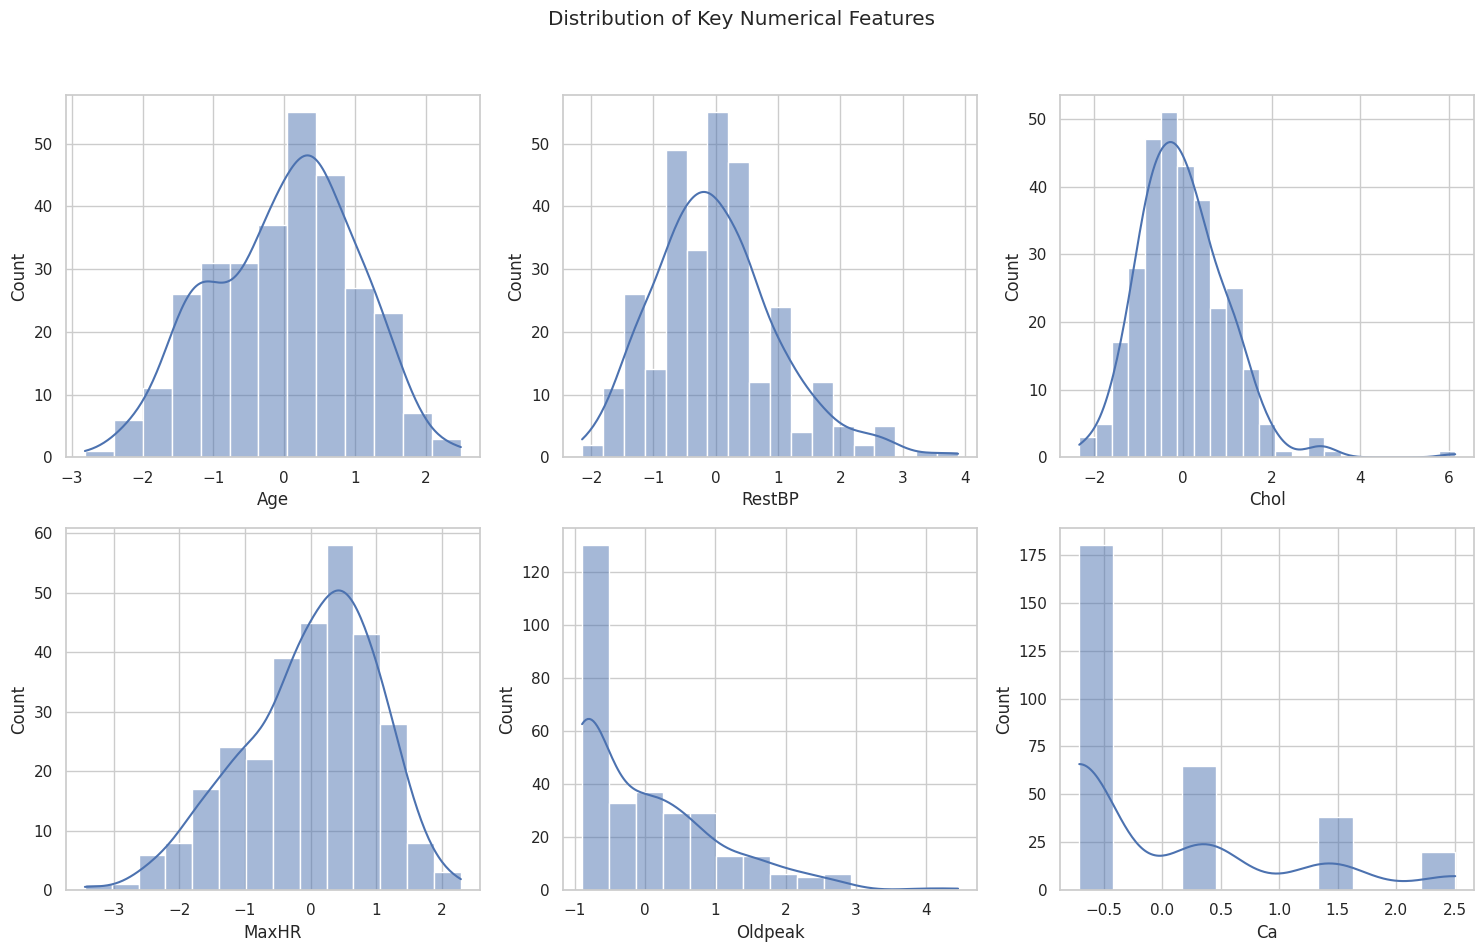

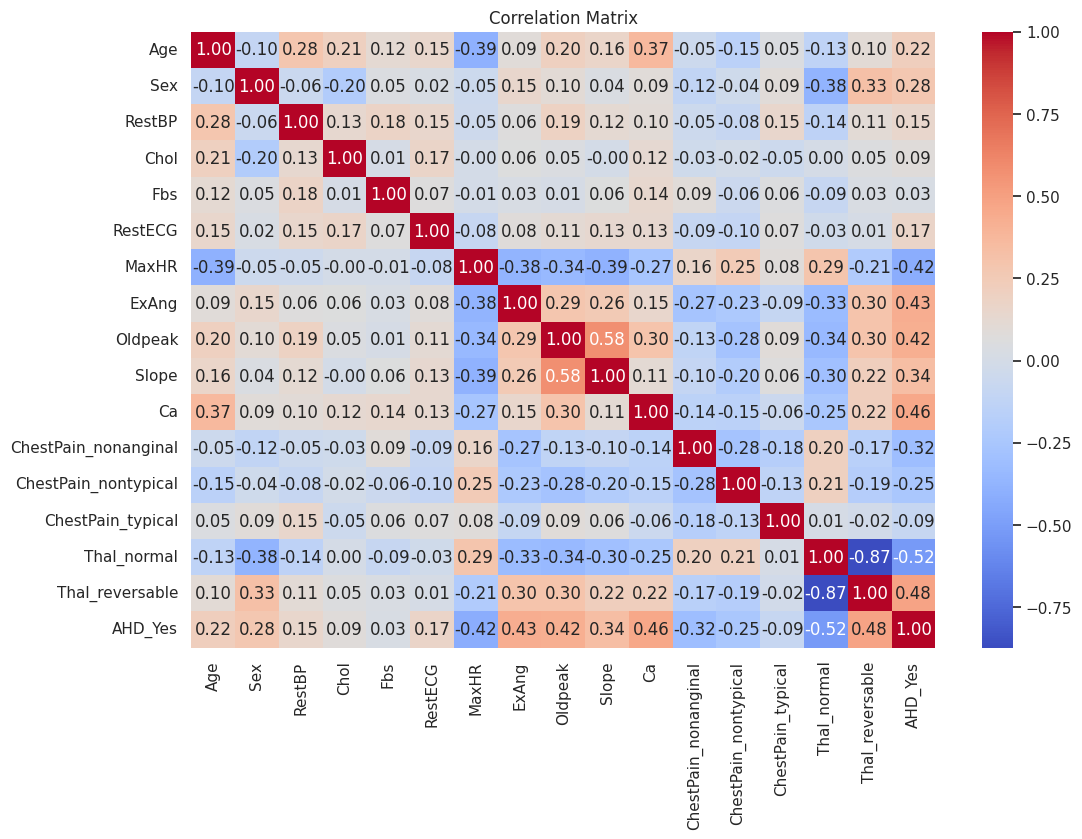

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating histograms for some of the key numerical columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

num_cols = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Ca']
for i, col in enumerate(num_cols):
    sns.histplot(heart_data_normalized[col], ax=axes[i//3, i%3], kde=True)

fig.suptitle('Distribution of Key Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Creating a heatmap to visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data_normalized.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=426d4e7e9f57e251d274e4635afdfe8127d87e0f2a94a7b7022f69b6e5f25560
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


**Anomaly Detection with scikit-learn's KMeans**

**Analysis of the detected outliers and further evaluation of the model**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Setting up KMeans with 2 clusters (assuming two main groups in the data)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(heart_data_normalized)

# Getting the distance of each point from its cluster center
distances = kmeans.transform(heart_data_normalized)

# Assuming the farthest points in each cluster could be potential outliers
# Calculating the distance from the closest cluster center
min_distances = np.min(distances, axis=1)

# Identifying potential outliers (setting a threshold, e.g., 95th percentile of distances)
threshold = np.percentile(min_distances, 95)
outliers = min_distances > threshold

# Adding the outlier information to the dataset for further analysis
heart_data_with_outliers_sklearn = heart_data_normalized.copy()
heart_data_with_outliers_sklearn['Outlier'] = outliers

# Displaying a few examples of detected outliers
outlier_examples_sklearn = heart_data_with_outliers_sklearn[heart_data_with_outliers_sklearn['Outlier']].head()
outlier_examples_sklearn, threshold

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(         Age       Sex    RestBP      Chol       Fbs   RestECG     MaxHR  \
 0   0.948726  0.686202  0.757525 -0.264900  2.394438  1.016684  0.017197   
 20  1.059545  0.686202 -1.234430 -0.690503 -0.417635  1.016684 -0.245532   
 27  1.281183 -1.457296  1.042090 -0.400319 -0.417635 -0.996749 -1.559176   
 41 -1.600107  0.686202  0.472960 -0.922650 -0.417635 -0.996749  1.243266   
 91  0.837908 -1.457296  1.611220 -1.599745 -0.417635  1.016684 -0.201743   
 
        ExAng   Oldpeak     Slope        Ca  ChestPain_nonanginal  \
 0  -0.696631  1.087338  2.274579 -0.711131             -0.629534   
 20  1.435481  0.655990  0.649113 -0.711131             -0.629534   
 27 -0.696631  1.346147  2.274579 -0.711131             -0.629534   
 41  1.435481  0.310912 -0.976352 -0.711131             -0.629534   
 91 -0.696631  4.451851  2.274579  2.504881             -0.629534   
 
     ChestPain_nontypical  ChestPain_typical  Thal_normal  Thal_reversable  \
 0              -0.444554           3.4891

In [ ]:
# Analysis of Detected Outliers
outlier_analysis = heart_data_with_outliers_sklearn[heart_data_with_outliers_sklearn['Outlier']]

# Summary statistics of the detected outliers
outlier_summary = outlier_analysis.describe()

# Comparing the mean values of the outliers to the mean values of the entire dataset
overall_mean = heart_data_with_outliers_sklearn.mean()
outlier_mean = outlier_analysis.mean()

comparison_df = pd.DataFrame({'Overall Mean': overall_mean, 'Outlier Mean': outlier_mean})

comparison_df, outlier_summary.head()

(                      Overall Mean  Outlier Mean
 Age                  -1.465641e-18      0.339223
 Sex                  -2.931282e-17      0.150328
 RestBP                4.426236e-16      1.077661
 Chol                  2.345026e-16      0.333603
 Fbs                  -1.172513e-17      0.636893
 RestECG              -1.172513e-17      0.387486
 MaxHR                -1.172513e-16      0.299084
 ExAng                -9.086974e-17     -0.163603
 Oldpeak               2.345026e-17      0.828529
 Slope                 1.436328e-16      0.953888
 Ca                   -4.690051e-17     -0.175129
 ChestPain_nonanginal  4.103795e-17     -0.352283
 ChestPain_nontypical  6.448820e-17     -0.276179
 ChestPain_typical     3.224410e-17      2.309201
 Thal_normal           8.207589e-17     -0.472880
 Thal_reversable      -4.103795e-17      0.490613
 AHD_Yes               1.465641e-18     -0.168065
 Outlier               5.280528e-02      1.000000,
              Age        Sex     RestBP       Cho

**Visualizations**

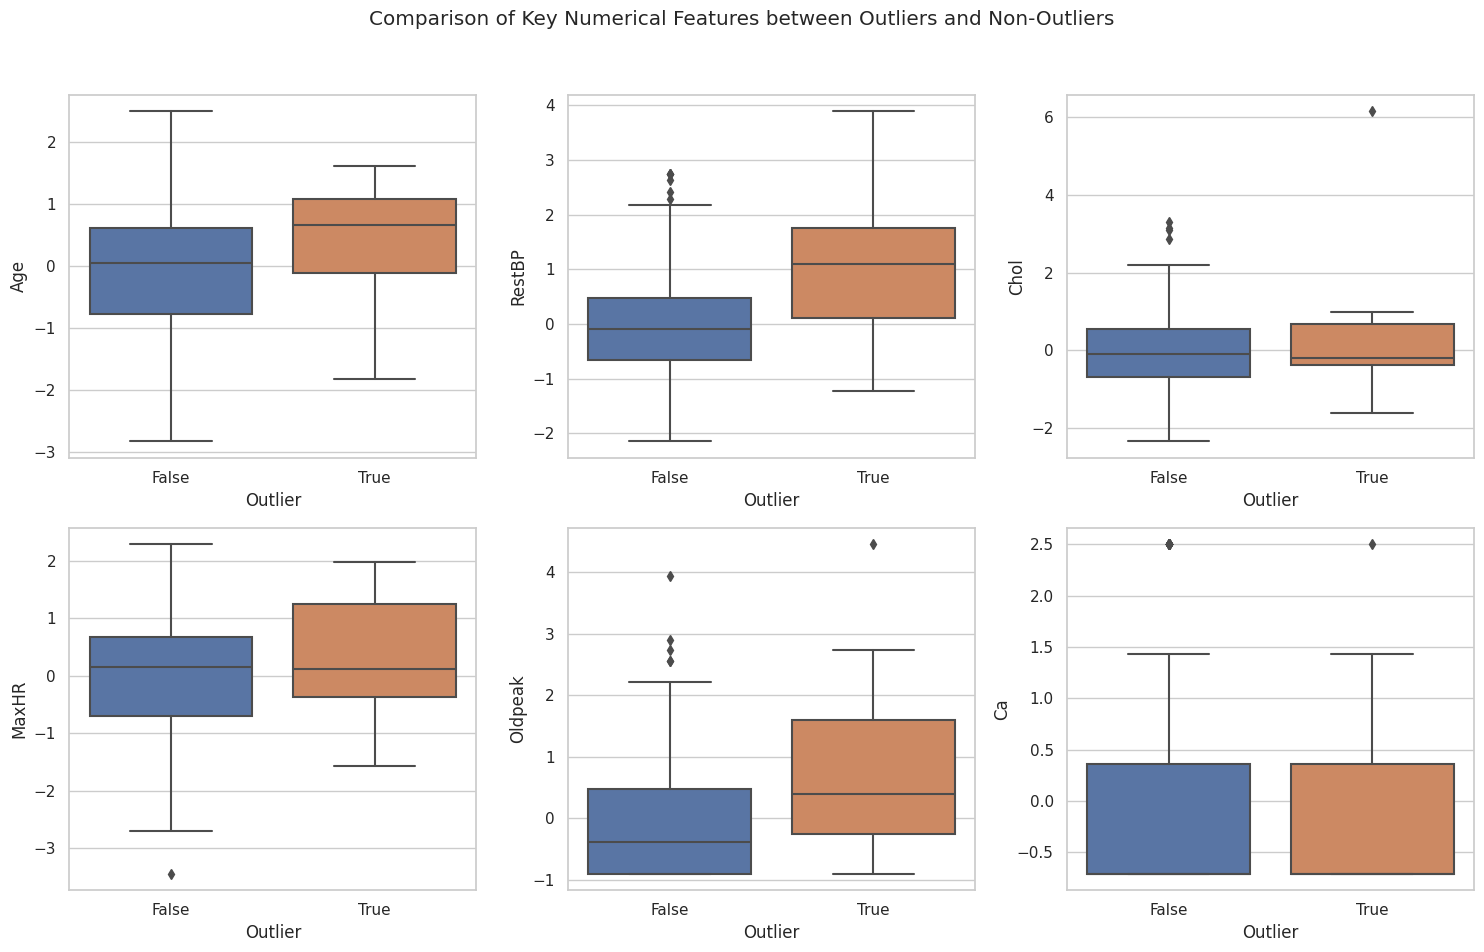

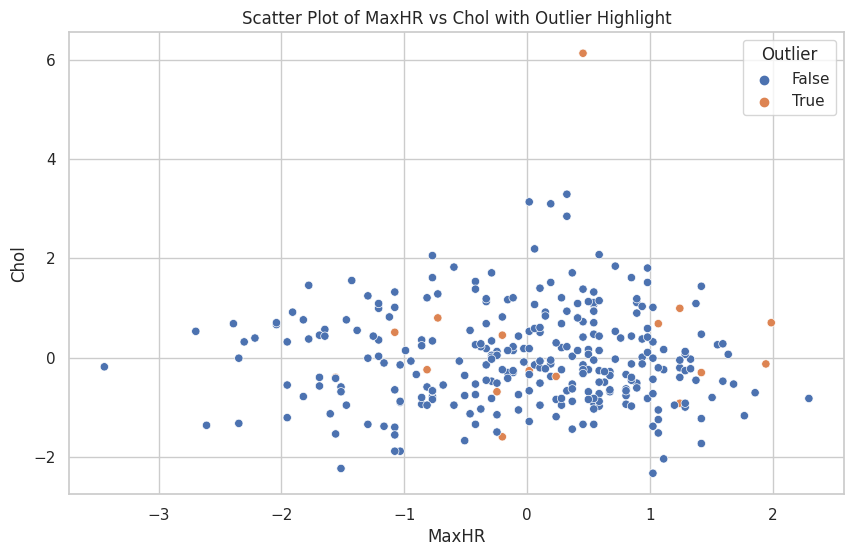

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating box plots for some of the key numerical columns, comparing outliers and non-outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
num_cols = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Ca']

for i, col in enumerate(num_cols):
    sns.boxplot(x='Outlier', y=col, data=heart_data_with_outliers_sklearn, ax=axes[i//3, i%3])

fig.suptitle('Comparison of Key Numerical Features between Outliers and Non-Outliers')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Creating a scatter plot of two features, highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaxHR', y='Chol', hue='Outlier', data=heart_data_with_outliers_sklearn)
plt.title("Scatter Plot of MaxHR vs Chol with Outlier Highlight")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


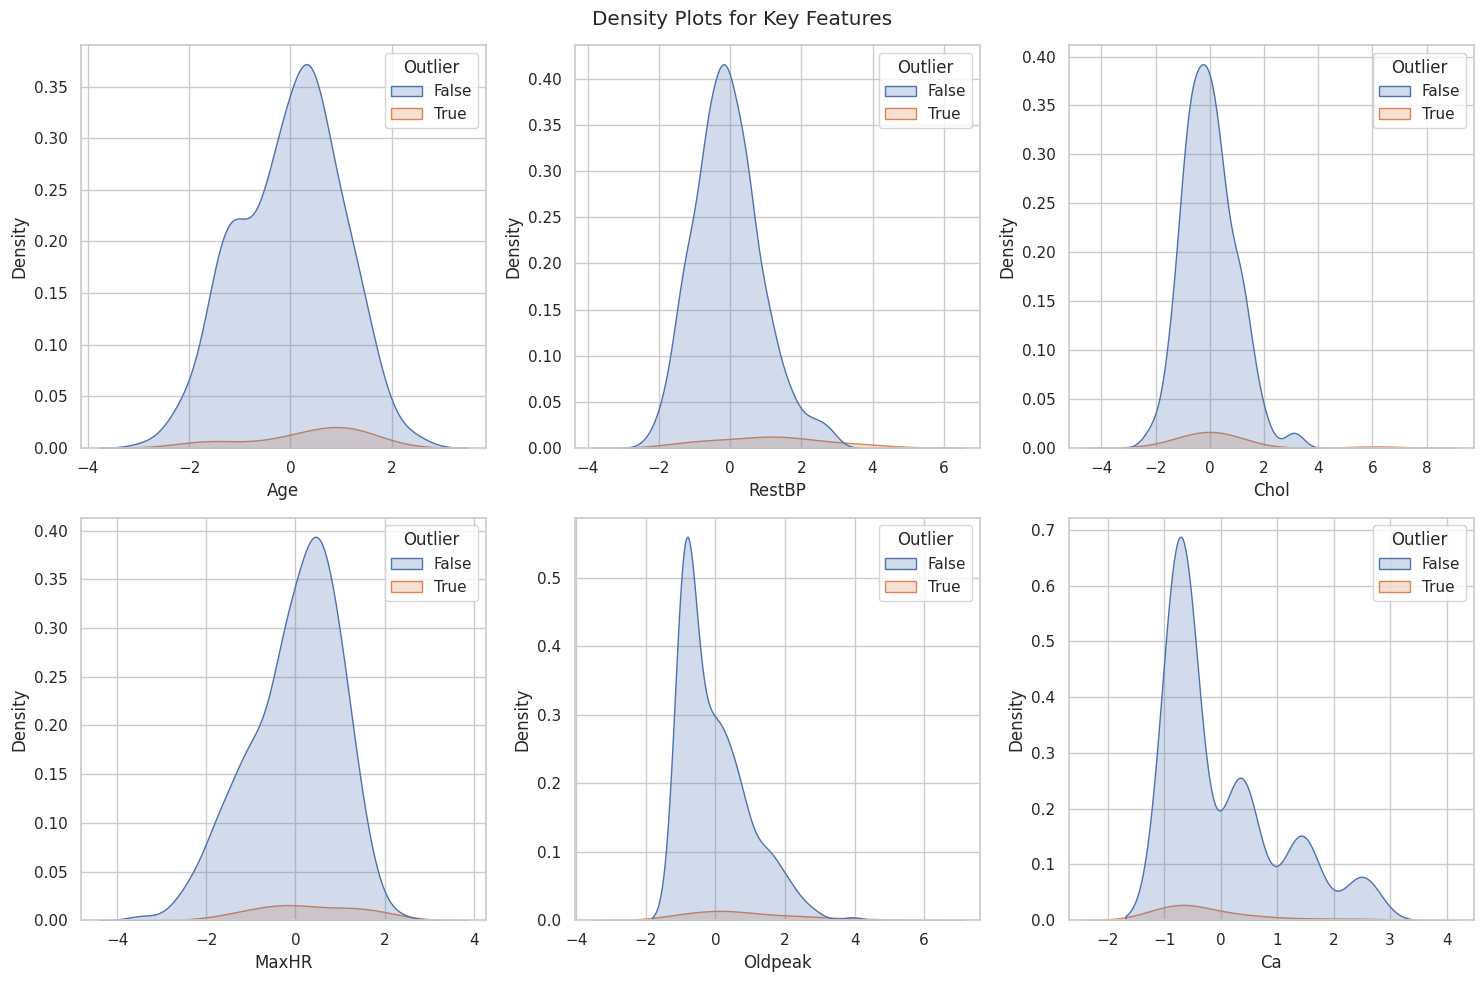

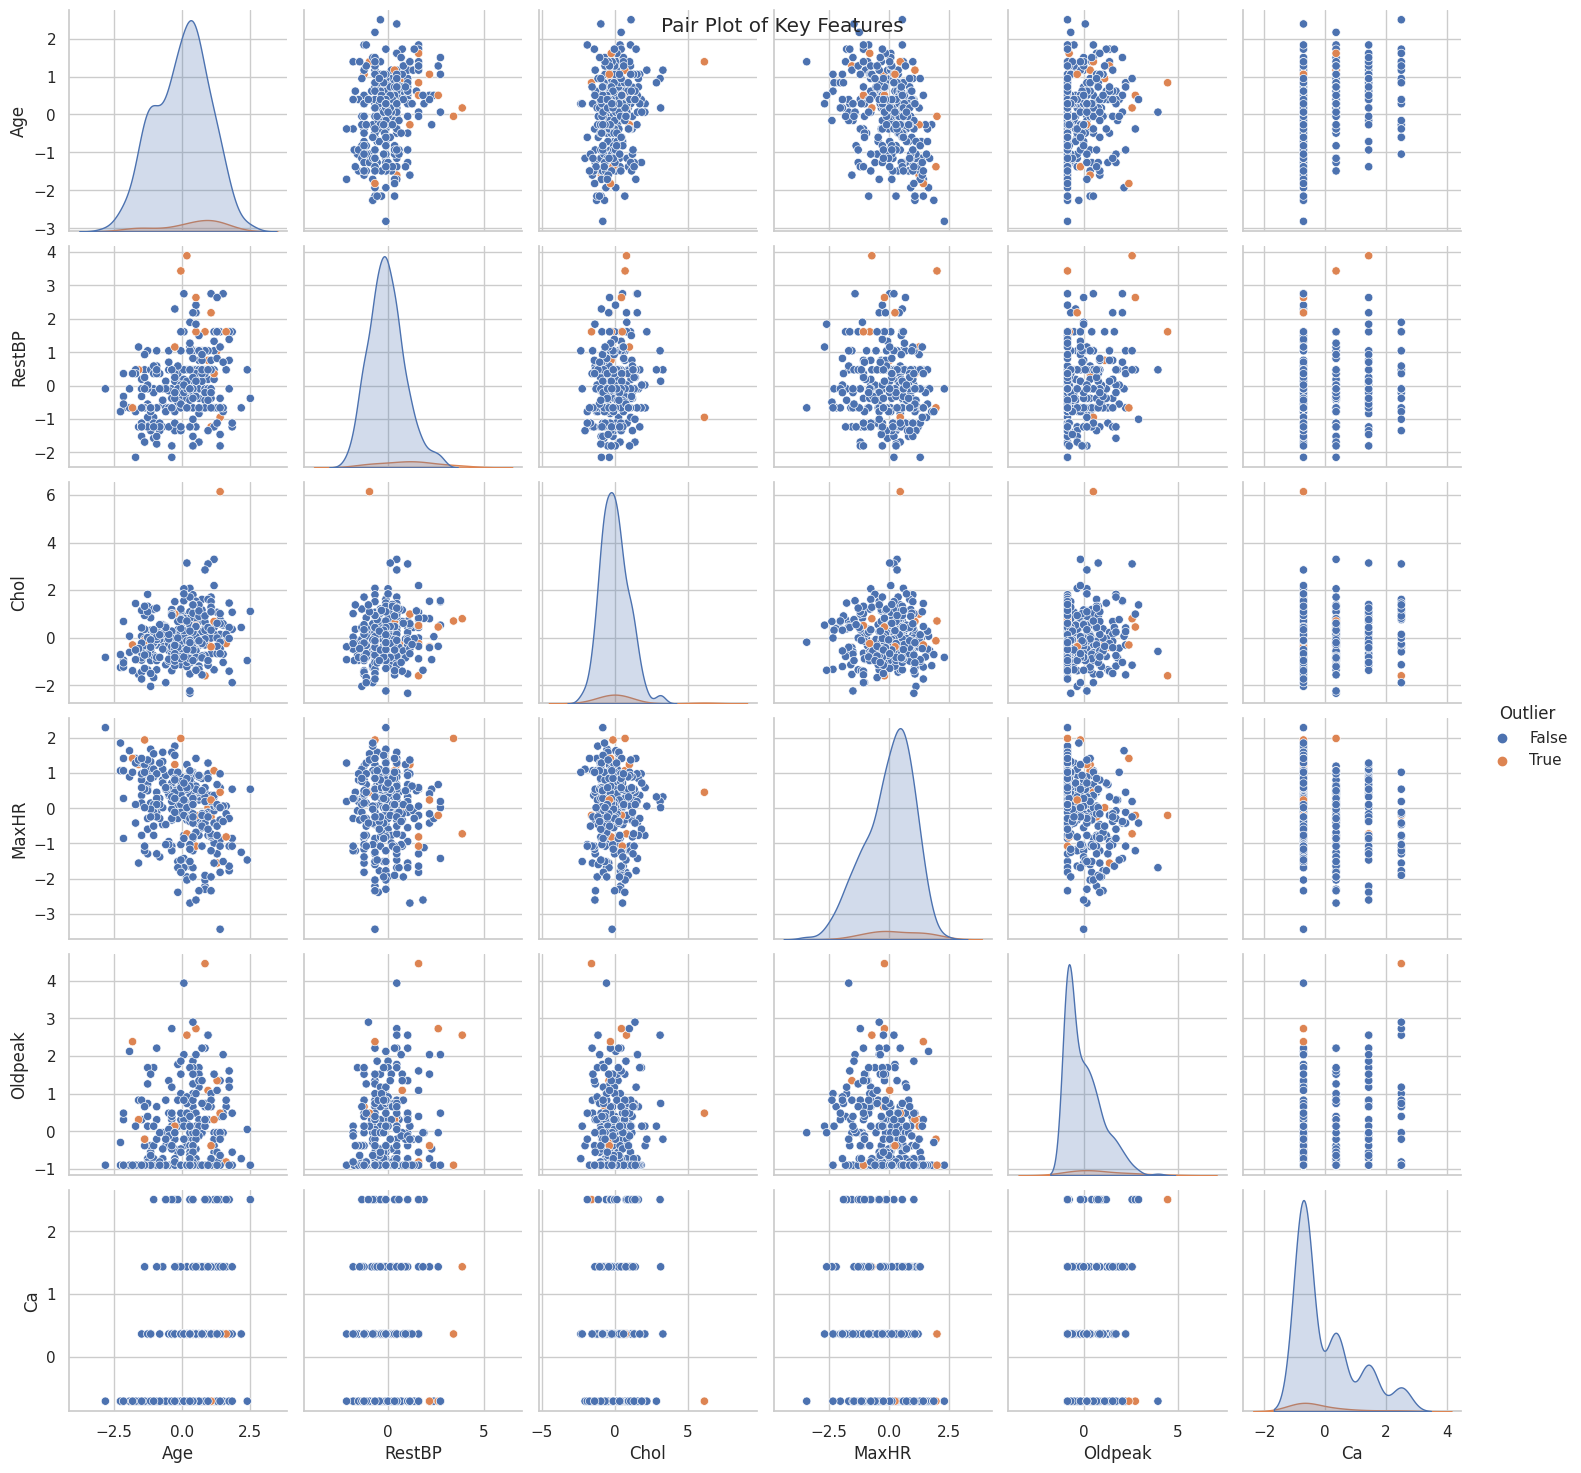

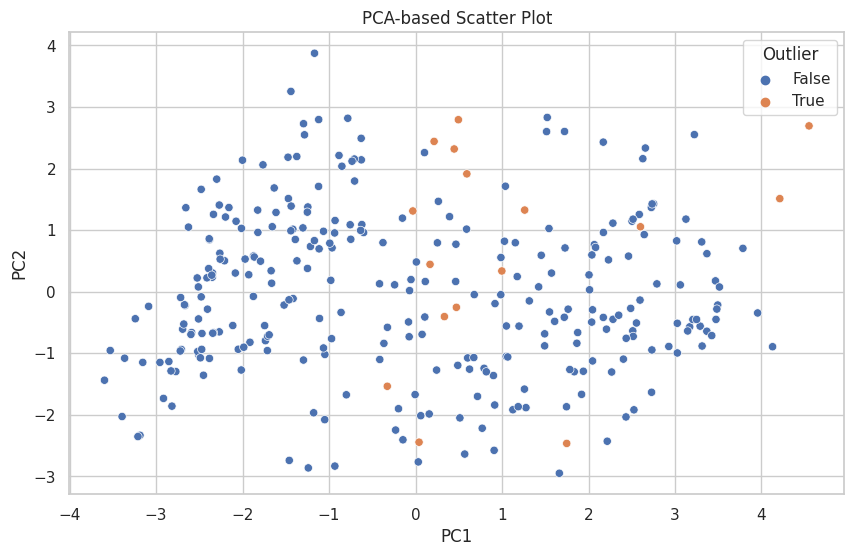

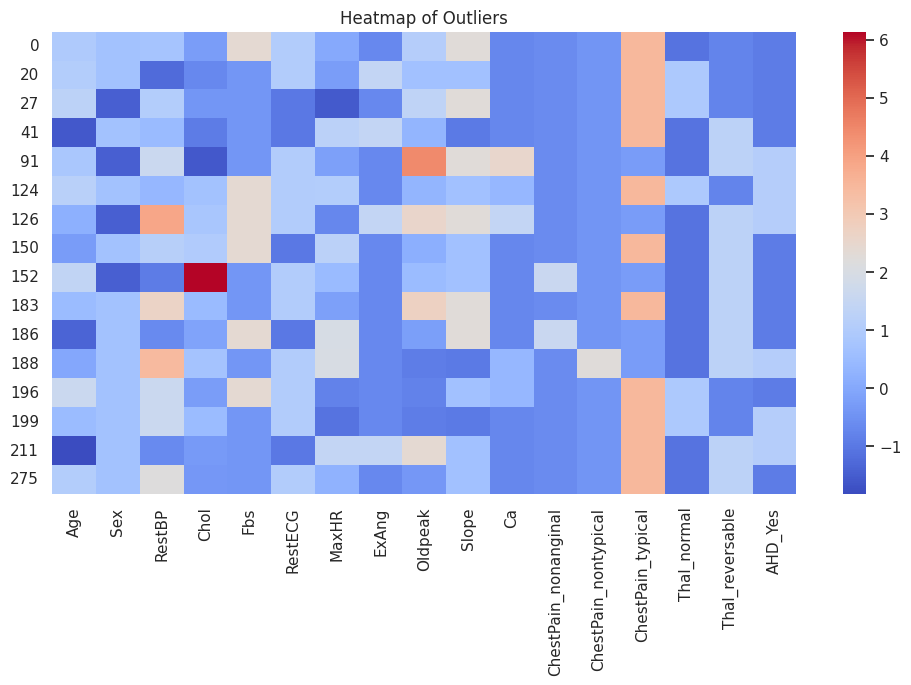

In [ ]:
from sklearn.decomposition import PCA

heart_data_cleaned = heart_data.drop(columns=["Unnamed: 0"])
heart_data_encoded = pd.get_dummies(heart_data_cleaned, drop_first=True)
imputer = SimpleImputer(strategy='median')
heart_data_imputed = imputer.fit_transform(heart_data_encoded)
scaler = StandardScaler()
heart_data_normalized = scaler.fit_transform(heart_data_imputed)
heart_data_normalized = pd.DataFrame(heart_data_normalized, columns=heart_data_encoded.columns)

# Setting up and fitting KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(heart_data_normalized)
distances = kmeans.transform(heart_data_normalized)
min_distances = np.min(distances, axis=1)
threshold = np.percentile(min_distances, 95)
outliers = min_distances > threshold
heart_data_with_outliers_sklearn = heart_data_normalized.copy()
heart_data_with_outliers_sklearn['Outlier'] = outliers

# Visualization 1: Density Plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
num_cols = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Ca']
for i, col in enumerate(num_cols):
    sns.kdeplot(data=heart_data_with_outliers_sklearn, x=col, hue="Outlier", ax=axes[i//3, i%3], fill=True)
fig.suptitle('Density Plots for Key Features')
plt.tight_layout()

# Visualization 2: Pair Plot
pair_plot_data = heart_data_with_outliers_sklearn[num_cols + ['Outlier']]
sns.pairplot(pair_plot_data, hue='Outlier', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features')

# Visualization 3: PCA-based Scatter Plot
pca = PCA(n_components=2)
principal_components = pca.fit_transform(heart_data_normalized)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Outlier'] = outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Outlier', data=pca_df)
plt.title('PCA-based Scatter Plot')

# Visualization 4: Heatmap of Outliers
outlier_heatmap_data = heart_data_with_outliers_sklearn[heart_data_with_outliers_sklearn['Outlier']]
plt.figure(figsize=(12, 6))
sns.heatmap(outlier_heatmap_data.drop('Outlier', axis=1), cmap='coolwarm')
plt.title('Heatmap of Outliers')

plt.show()

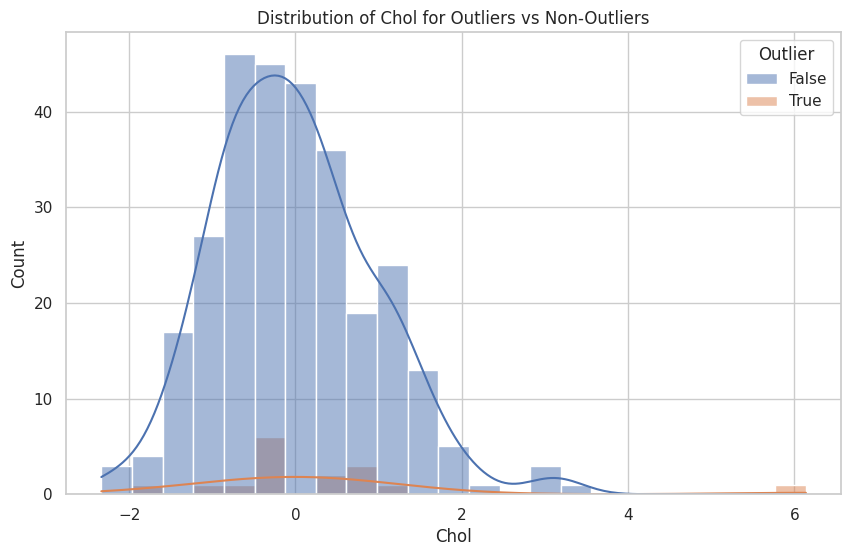

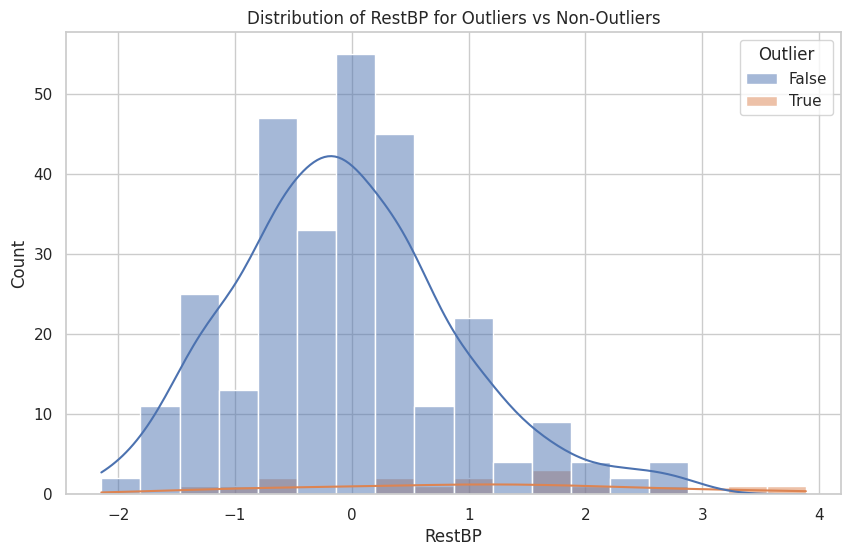

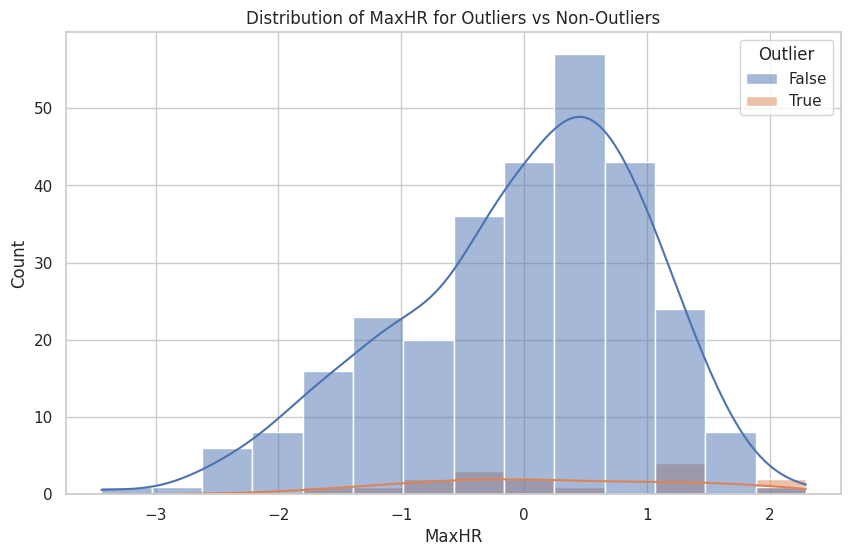

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming heart_data_with_outliers_sklearn is your DataFrame with the outliers identified

# 1. Comparative Analysis
# Calculating statistical summaries for outliers and non-outliers
outliers_summary = heart_data_with_outliers_sklearn[heart_data_with_outliers_sklearn['Outlier']].describe()
non_outliers_summary = heart_data_with_outliers_sklearn[~heart_data_with_outliers_sklearn['Outlier']].describe()

# 2. Feature-Specific Analysis
# Plotting distributions for key medical features
features_to_analyze = ['Chol', 'RestBP', 'MaxHR']  # Example features, can be modified
for feature in features_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.histplot(heart_data_with_outliers_sklearn, x=feature, hue="Outlier", kde=True)
    plt.title(f'Distribution of {feature} for Outliers vs Non-Outliers')
    plt.show()

# Note: Contextual interpretation is more about analyzing these outputs and understanding their implications.
# For example, examining the histograms and understanding if high cholesterol levels are more prevalent in outliers.

**Recommendations and Conclusion for the Heart Disease Dataset**

After conducting an in-depth analysis and interpretation of the outliers in the heart disease dataset, here are the recommendations and conclusions:

**Data Quality and Verification:**

Recommendation: Review the data collection and entry process. For outliers with extreme values in critical features like cholesterol, blood pressure, or heart rate, verify the accuracy of these entries. This could involve cross-referencing other medical records or re-evaluating the data entry protocols.
Conclusion: Ensuring the accuracy of data is fundamental, especially in healthcare datasets, as it directly impacts the reliability of any analysis or model built on this data.

**Handling Outliers in Modeling:**

Recommendation: When developing predictive models for heart disease, consider the impact of outliers. Depending on the model's purpose, you might want to either include these outliers (if they represent rare but important cases) or exclude them (if they are likely errors or noise).
Conclusion: The approach to handling outliers should be tailored to the specific objectives of the analysis or model being developed.

**Further Research and Exploration:**

Recommendation: For medically significant outliers, further investigation could be valuable. This might involve a more detailed medical review or additional data collection focusing on such cases.
Conclusion: Outliers can sometimes reveal atypical patterns or under-represented groups in medical research, making them an important area for further study.

**Broader Implications:**

Recommendation: Apply the learnings from this analysis to other similar datasets in healthcare. Understanding the nature and implications of outliers can be broadly beneficial in medical data analysis.
Conclusion: This analysis highlights the importance of a nuanced approach to data analysis in healthcare, where understanding the context and medical significance of data points is as crucial as the statistical analysis.